# Word2Vec

## 영어 데이터 다운로드 및 전처리

**영어 Word2Vec**

In [ ]:
import re
from lxml import etree
import urllib.request
import zipfile
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7fc86c47a150>)

In [ ]:
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [ ]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [ ]:
for line in result[:3]: # 샘플 3개만 출력
    print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


result => 이중 리스트

## 영어 Word2Vec 훈련시키기

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

여기서 Word2Vec의 하이퍼파라미터값은 다음과 같습니다.  

size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.  
window = 컨텍스트 윈도우 크기  
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)  
workers = 학습을 위한 프로세스 수  
sg = 0은 CBOW, 1은 Skip-gram.  

In [ ]:
model_result = model.wv.most_similar("man")
print(model_result)

[('guy', 0.8328959345817566), ('woman', 0.8324347734451294), ('lady', 0.7849633693695068), ('boy', 0.7561445236206055), ('girl', 0.7454304695129395), ('gentleman', 0.738538920879364), ('soldier', 0.7335200309753418), ('kid', 0.6728432774543762), ('surgeon', 0.6697134971618652), ('rabbi', 0.6648719906806946)]


In [ ]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [ ]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('guy', 0.8328959345817566), ('woman', 0.8324347734451294), ('lady', 0.7849633693695068), ('boy', 0.7561445236206055), ('girl', 0.7454304695129395), ('gentleman', 0.738538920879364), ('soldier', 0.7335200309753418), ('kid', 0.6728432774543762), ('surgeon', 0.6697134971618652), ('rabbi', 0.6648719906806946)]


## 한국어 데이터 다운로드 및 전처리

KoNLPy의 OKT 등은 형태소 분석 속도가 너무 느림. 그래서 Mecab을 설치.  
단, Mecab은 형태소 분석 속도는 빠르지만 설치하는데 시간이 좀 걸림.

In [ ]:
# !pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 60 (delta 23), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (60/60), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4MB 69.8MB/s 
     |████████████████████████████████| 3.8MB 52.7MB/s 
     |████████████████████████████████| 92kB 10.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2020-09-12 15:11:44--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.g

In [ ]:
import urllib.request
from konlpy.tag import Mecab
from gensim.models.word2vec import Word2Vec
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f298cd5add8>)

In [ ]:
train_data = pd.read_table('ratings.txt')

In [ ]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [ ]:
print(len(train_data)) # 리뷰 개수 출력

200000


In [ ]:
# NULL 값 존재 유무
print(train_data.isnull().values.any())

True


In [ ]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
print(len(train_data)) # 리뷰 개수 출력

199992


In [ ]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [ ]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
# 불용어 정의
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [ ]:
# 형태소 분석기 mecab을 사용한 토큰화 작업 (다소 시간 소요)
mecab = Mecab()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = mecab.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 74
리뷰의 평균 길이 : 11.99344973798952


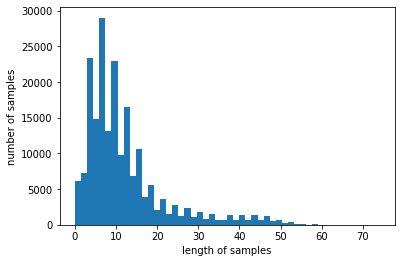

In [ ]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

## 한국어 Word2Vec 훈련시키기

nested list를 데이터로 넣어줌.

[['나는', '사과를', 먹는다'], ['이', '영화', '는', '재밌어']]

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(18135, 100)

In [ ]:
print(model.wv.most_similar("최민식"))

[('드니로', 0.8718392252922058), ('안성기', 0.8683319091796875), ('신들린', 0.8608235120773315), ('한석규', 0.8545922040939331), ('송강호', 0.8537637591362), ('박신양', 0.8519797921180725), ('워싱턴', 0.8472980260848999), ('황정민', 0.8391457200050354), ('설경구', 0.8382948637008667), ('테론', 0.8371904492378235)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
print(model.wv.most_similar("히어로"))

[('슬래셔', 0.8642855286598206), ('최고봉', 0.837036669254303), ('호러', 0.8362128734588623), ('정통', 0.8149666786193848), ('무협', 0.8104077577590942), ('패러디', 0.8028144836425781), ('느와르', 0.8028136491775513), ('괴수', 0.8015121817588806), ('무비', 0.7921817898750305), ('원조', 0.7918606400489807)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
%pwd

'/content/Mecab-ko-for-Google-Colab'

In [ ]:
%cd ..

/content


In [ ]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('kor_w2v') # 모델 저장

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


## 영어 Word2Vec 시각화하기

eng_w2v라는 Word2Vec 모델이 이미 존재한다는 가정 하에 아래 커맨드를 수행.

In [ ]:
!python -m gensim.scripts.word2vec2tensor --input eng_w2v --output eng_w2v

2021-06-13 03:08:02,456 - word2vec2tensor - INFO - running /usr/local/lib/python3.7/dist-packages/gensim/scripts/word2vec2tensor.py --input eng_w2v --output eng_w2v
2021-06-13 03:08:02,456 - utils_any2vec - INFO - loading projection weights from eng_w2v
2021-06-13 03:08:04,508 - utils_any2vec - INFO - loaded (21613, 100) matrix from eng_w2v
2021-06-13 03:08:06,192 - word2vec2tensor - INFO - 2D tensor file saved to eng_w2v_tensor.tsv
2021-06-13 03:08:06,192 - word2vec2tensor - INFO - Tensor metadata file saved to eng_w2v_metadata.tsv
2021-06-13 03:08:06,194 - word2vec2tensor - INFO - finished running word2vec2tensor.py


커맨드를 수행하면 경로에 기존에 있던 eng_w2v 외에도 두 개의 파일이 생김.



링크 : https://projector.tensorflow.org/  

해당 링크로 이동!

위에 있는 Choose file 버튼을 누르고 eng_w2v_tensor.tsv 파일을 업로드하고, 아래에 있는 Choose file 버튼을 누르고 eng_w2v_metadata.tsv 파일을 업로드. 두 파일을 업로드하면 임베딩 프로젝터에 학습했던 워드 임베딩 모델이 시각화.



## 한국어 Word2Vec 시각화하기

In [ ]:
!python -m gensim.scripts.word2vec2tensor --input kor_w2v --output kor_w2v

2020-09-12 15:17:47,602 - word2vec2tensor - INFO - running /usr/local/lib/python3.6/dist-packages/gensim/scripts/word2vec2tensor.py --input kor_w2v --output kor_w2v
2020-09-12 15:17:47,603 - utils_any2vec - INFO - loading projection weights from kor_w2v
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2020-09-12 15:17:49,156 - utils_any2vec - INFO - loaded (18135, 100) matrix from kor_w2v
2020-09-12 15:17:50,532 - word2vec2tensor - INFO - 2D tensor file saved to kor_w2v_tensor.tsv
2020-09-12 15:17:50,532 - word2vec2tensor - INFO - Tensor metadata file saved to kor_w2v_metadata.tsv
2020-09-12 15:17:50,534 - word2vec2tensor - INFO - finished running word2vec2tensor.py
